In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("bengaluru_house_prices.csv")

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


# EDA

In [5]:
df.shape

(13320, 9)

## Society

- society, balcony and bath has some missing values.
 - total-sqft is object but in really it is numeric.


In [6]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
5502/13220

0.4161875945537065

41% is missing values in society so we remove it firstly

In [8]:
df.drop(columns = ['society'],axis = 1,inplace = True)

In [9]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


## area_type

In [10]:
df['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [11]:
df.drop(columns = ['area_type'], axis = 1,inplace =True)

In [12]:
df.columns

Index(['availability', 'location', 'size', 'total_sqft', 'bath', 'balcony',
       'price'],
      dtype='object')

In [13]:
df.head()

,availability,location,size,total_sqft,bath,balcony,price
0,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [14]:
df['availability'].value_counts()

availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64

In [15]:
df.drop(columns = ['availability'],axis =1 ,inplace = True)

In [16]:
df.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [17]:
df.isna().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [18]:
df.location.value_counts()

location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [19]:
df['location'] = df['location'].fillna('Whitefield')

In [20]:
df['location'].isna().sum()

0

In [21]:
df['size'].value_counts()

size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [22]:
df['size'] = df['size'].fillna('2 BHK')

In [23]:
df['size'].isna().sum()

0

In [24]:
df.bath.describe()

count    13247.000000
mean         2.692610
std          1.341458
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         40.000000
Name: bath, dtype: float64

In [25]:
df.bath.mean()

2.6926096474673513

In [26]:
df['bath'] = df['bath'].fillna(2)

In [27]:
df['balcony'].describe()

count    12711.000000
mean         1.584376
std          0.817263
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: balcony, dtype: float64

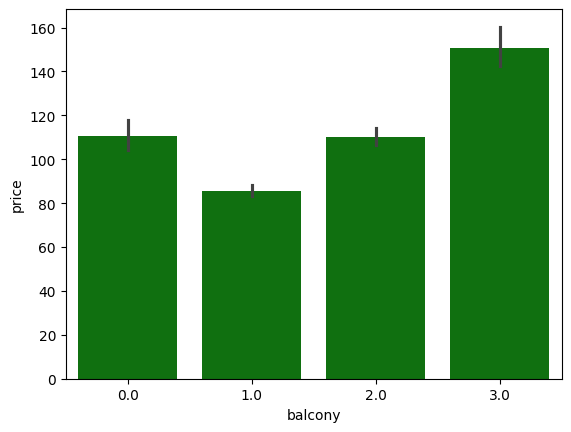

In [28]:
import matplotlib.pyplot as plt
sns.barplot(x = df['balcony'],y = df['price'],color = 'green')
plt.show()

In [29]:
df.drop(columns = ['balcony'],axis = 1,inplace = True)

In [30]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


# Data Preprocessing

## Location 

In [31]:
df['location'].value_counts()

location
Whitefield                        541
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [32]:
locat_cnt = df["location"].value_counts()
locat_names = locat_cnt.index
locat_names

Index(['Whitefield', 'Sarjapur  Road', 'Electronic City', 'Kanakpura Road',
       'Thanisandra', 'Yelahanka', 'Uttarahalli', 'Hebbal', 'Marathahalli',
       'Raja Rajeshwari Nagar',
       ...
       'Vidyapeeta', 'Maruthi Extension', 'Okalipura', 'Old Town',
       'Vasantapura main road', 'Bapuji Layout',
       '1st Stage Radha Krishna Layout', 'BEML Layout 5th stage',
       'singapura paradise', 'Abshot Layout'],
      dtype='object', name='location', length=1305)

In [33]:
correct_locations = []

for name in locat_names:
    if locat_cnt[name] > 10:
        correct_locations.append(name)

def clean_locat(locat):
    if not locat in correct_locations:
        return "Others"
    return locat

In [34]:
df["location"] = df["location"].apply(clean_locat)

In [35]:
df.location.value_counts()

location
Others                2900
Whitefield             541
Sarjapur  Road         399
Electronic City        302
Kanakpura Road         273
                      ... 
Marsur                  11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: count, Length: 242, dtype: int64

## Size 

In [36]:
df['bhk'] = df['size'].apply(lambda x:x.split(" ")[0])

In [37]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [38]:
def clean_sqft(x):
    temp = x.split(" - ")
    if len(temp) == 2:
        return (float(temp[0]) + float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

In [39]:
df['total_sqft'] = df['total_sqft'].apply(clean_sqft)

In [40]:
df['total_sqft'].describe()

count    13274.000000
mean      1559.626694
std       1238.405258
min          1.000000
25%       1100.000000
50%       1276.000000
75%       1680.000000
max      52272.000000
Name: total_sqft, dtype: float64

In [41]:
df['price_per_sqft'] = df['price'] * 100000/ df['total_sqft']

In [42]:
df.describe()

,total_sqft,bath,price,price_per_sqft
count,13274.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,7.907501e+03
std,1238.405258,1.338754,148.971674,1.064296e+05
min,1.000000,1.000000,8.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,1.200000e+07


In [43]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [44]:
df['bhk'] = df['bhk'].astype(int)

In [45]:
(df['total_sqft'] / df['bhk']).describe()

count    13274.000000
mean       575.074878
std        388.205175
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

In [46]:
df = df[(df['total_sqft']/df['bhk'] >= 300)]

In [47]:
df.shape

(12530, 7)

In [48]:
(df['total_sqft']/df['bhk']).describe()

count    12530.000000
mean       597.801113
std        387.603963
min        300.000000
25%        492.000000
50%        562.500000
75%        630.333333
max      26136.000000
dtype: float64

In [49]:
df.price_per_sqft.describe()

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [50]:
df = df[df['price_per_sqft'] < 24000]

In [51]:
df['bhk'].describe()

count    12436.000000
mean         2.639353
std          0.963904
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         16.000000
Name: bhk, dtype: float64

In [52]:
df = df[df['bhk'] < 7]

In [53]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [54]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12348.000000,12348.000000,12348.000000,12348.000000,12348.000000
mean,1563.638301,2.510447,103.939301,2.600907,6092.510810
std,1164.477857,0.958930,116.871304,0.843907,3070.789339
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1115.000000,2.000000,49.000000,2.000000,4203.059701
50%,1300.000000,2.000000,69.000000,3.000000,5280.338350
75%,1690.000000,3.000000,112.000000,3.000000,6857.142857
max,52272.000000,9.000000,2340.000000,6.000000,23719.165085


<Axes: xlabel='price', ylabel='Count'>

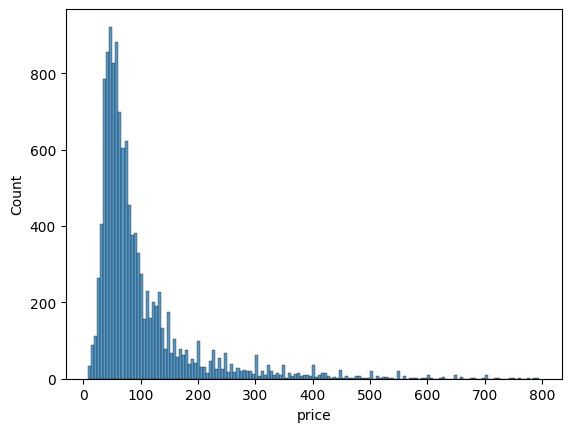

In [60]:
sns.histplot(df['price'])

In [61]:
df = df[df['price'] > 10]

In [62]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12294.000000,12294.000000,12294.000000,12294.000000,12294.000000
mean,1541.295827,2.502034,99.820973,2.595168,6048.408122
std,1054.714601,0.945236,92.137519,0.836808,2968.229562
min,300.000000,1.000000,10.250000,1.000000,267.829813
25%,1113.000000,2.000000,48.950000,2.000000,4201.680672
50%,1298.000000,2.000000,69.000000,3.000000,5272.727273
75%,1681.750000,3.000000,110.000000,3.000000,6827.260395
max,52272.000000,8.000000,795.000000,6.000000,23674.242424


In [63]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [65]:
df1= df.drop(columns =['size','price_per_sqft'])

In [71]:
df1.to_csv('Cleaned_data.csv')

In [78]:
df1.isna().sum()

location      0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

# Training Medols

In [69]:
X = df1.drop('price',axis = 1)
y = df['price']

In [70]:
X.head()

,location,total_sqft,bath,bhk
0,Electronic City Phase II,1056.0,2.0,2
1,Chikka Tirupathi,2600.0,5.0,4
2,Uttarahalli,1440.0,2.0,3
3,Lingadheeranahalli,1521.0,3.0,3
4,Kothanur,1200.0,2.0,2


In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [74]:
X_train.shape

(9835, 4)

In [75]:
X_test.shape

(2459, 4)

In [79]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [80]:
column_trans = make_column_transformer((OneHotEncoder(sparse_output = False),['location']),
                                       remainder = 'passthrough')


In [81]:
scaler = StandardScaler()

In [83]:
lr = LinearRegression()

In [84]:
pipe = make_pipeline(column_trans,scaler,lr)

In [85]:
pipe.fit(X_train,y_train)

D:\ai-projects-env\lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [86]:
y_pred = pipe.predict(X_test)
print(r2_score(y_test,y_pred))

0.6062558317502609


In [89]:
## Laso

In [90]:
lasso =Lasso()

In [91]:
pipe = make_pipeline(column_trans,scaler,lasso)

In [92]:
pipe.fit(X_train,y_train)

D:\ai-projects-env\lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [93]:
y_pred1 = pipe.predict(X_test)
print(r2_score(y_test,y_pred1))

0.5959521428810441


In [94]:
from sklearn.tree import DecisionTreeRegressor

In [95]:
dt = DecisionTreeRegressor(max_depth = 7)

In [96]:
pipe = make_pipeline(column_trans,scaler,dt)

In [97]:
pipe.fit(X_train,y_train)

D:\ai-projects-env\lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor(max_depth=7))])

In [98]:
y_pred2 = pipe.predict(X_test)
print(r2_score(y_test,y_pred2))

0.6970641183139782


In [99]:
pipe.score(X_train,y_train)

0.7383674739210171

In [100]:
from sklearn.ensemble import RandomForestRegressor

In [101]:
rf = RandomForestRegressor(n_estimators = 200,max_depth = 8)

In [103]:
pipe = make_pipeline(column_trans,scaler,rf)

In [104]:
pipe.fit(X_train,y_train)

D:\ai-projects-env\lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=8, n_estimators=200))])

In [107]:
y_pred3 = pipe.predict(X_test)
print(r2_score(y_test,y_pred3))

0.7209830677915228


In [108]:
from xgboost import XGBRegressor

In [158]:
xgb = XGBRegressor(n_estimators = 200,max_depth = 8)

In [159]:
pipe = make_pipeline(column_trans,scaler,xgb)

In [160]:
pipe.fit(X_train,y_train)

D:\ai-projects-env\lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=8, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=200, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [161]:
y_pred4 = pipe.predict(X_test)
print(r2_score(y_test,y_pred4))

0.7727889443276814


In [162]:
pipe.score(X_train,y_train)

0.8904225444676942

In [157]:
from sklearn.neighbors import KNeighborsRegressor

In [126]:
knn = KNeighborsRegressor(n_neighbors = 7)

In [127]:
pipe10 = make_pipeline(column_trans,scaler,knn)

In [128]:
pipe10.fit(X_train,y_train)

D:\ai-projects-env\lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor(n_neighbors=7))])

In [130]:
y_pred5  = pipe10.predict(X_test)
print(r2_score(y_test,y_pred5))

0.6665545176665102


In [163]:
import pickle
pickle.dump(pipe,open("lr.pkl","wb"))